# Import Libraries

In [42]:
# =======================
#     Core Libraries
# =======================
import os
import pickle
import numpy as np
import pandas as pd

# =======================
#   Data Visualization
# =======================
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
#      Preprocessing
# =======================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# =======================
#       ML Models
# =======================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# =======================
#   Evaluation Metrics
# =======================
from sklearn.metrics import accuracy_score, f1_score

# Basic Tasks

In [43]:
# Load Dataset
df = pd.read_csv("./datasets/thyroid_disease.csv")

In [44]:
# Display First 5 Rows
print("Head of the dataset:\n")
df.head()

Head of the dataset:



,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [45]:
# Shape of the Dataset
print("Shape of the dataset:\n")
df.shape

Shape of the dataset:



(383, 17)

In [46]:
# Info about Dataset
print("Info about the dataset:\n")
df.info()

Info about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response       

In [47]:
# Check for Duplicates and Remove if Any
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}\n")

if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed.")

Total duplicate rows: 19

✅ Duplicates removed.


In [48]:
# Check and Handle Missing Values
print(f"Shape of dataset before removing missing values:{df.shape} \n")

missing = df.isnull().mean() * 100
print("Missing Value Percentage:\n", missing)

for col in df.columns[df.isnull().any()]:
    if missing[col] < 5:
        df.dropna(subset=[col], inplace=True)
        print(f"✅ Dropped rows with missing values in '{col}' (<5%).")
    else:
        fill_value = df[col].mode()[0] if df[col].dtype == 'object' else df[col].median()
        df[col].fillna(fill_value, inplace=True)
        print(f"🔧 Filled missing values in '{col}' with {'mode' if df[col].dtype == 'object' else 'median'}.")

print(f"Shape of dataset after removing missing values:{df.shape} \n")

Shape of dataset before removing missing values:(364, 17) 

Missing Value Percentage:
 Age                     0.0
Gender                  0.0
Smoking                 0.0
Hx Smoking              0.0
Hx Radiothreapy         0.0
Thyroid Function        0.0
Physical Examination    0.0
Adenopathy              0.0
Pathology               0.0
Focality                0.0
Risk                    0.0
T                       0.0
N                       0.0
M                       0.0
Stage                   0.0
Response                0.0
Recurred                0.0
dtype: float64
Shape of dataset after removing missing values:(364, 17) 



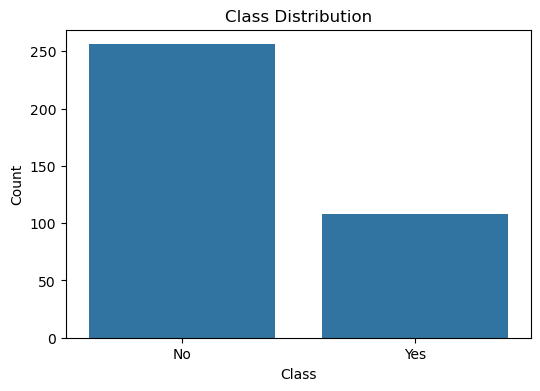

Class Distribution:
Recurred
No     256
Yes    108
Name: count, dtype: int64
✅ Class distribution is balanced. No need to apply imbalance techniques.


In [49]:
# Class Distribution (Assuming last column is target)
target_col = df.columns[-1]

# Plotting the Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Checking for Imbalance
class_counts = df[target_col].value_counts()
print(f"Class Distribution:\n{class_counts}")

# If class distribution is imbalanced, suggest techniques
if class_counts.min() / class_counts.max() < 0.1:  # If the ratio between smallest and largest class is <10%
    print("⚠️ Class distribution is imbalanced. Consider applying imbalance handling techniques (like SMOTE, undersampling, or oversampling).")
else:
    print("✅ Class distribution is balanced. No need to apply imbalance techniques.")


# Data Preprocessing

## 1. Handling Data Types

In [50]:
# Iterate through columns and check for 'object' type
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print()  # For better readability

Unique values in 'Gender':
['F' 'M']

Unique values in 'Smoking':
['No' 'Yes']

Unique values in 'Hx Smoking':
['No' 'Yes']

Unique values in 'Hx Radiothreapy':
['No' 'Yes']

Unique values in 'Thyroid Function':
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Unique values in 'Physical Examination':
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Unique values in 'Adenopathy':
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Unique values in 'Pathology':
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Unique values in 'Focality':
['Uni-Focal' 'Multi-Focal']

Unique values in 'Risk':
['Low' 'Intermediate' 'High']

Unique values in 'T':
['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

Unique values in 'N':
['N0' 'N1b' 'N1a']

Unique values in 'M':
['M0' 'M1']

Unique values in 'Stage':
['I' 'II' 'IVB' 'III' 'IVA']

Unique values i

In [51]:
# 1. Label Encoding for binary columns (including 'Recurred')
binary_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality', 'Recurred']

label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"✅ Label Encoded '{col}'.")

# 2. One-Hot Encoding for multi-class columns
multi_class_columns = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 
                       'Pathology', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

df = pd.get_dummies(df, columns=multi_class_columns, drop_first=True)
print("\n✅ One-Hot Encoding applied to multi-class columns.")

# 3. Convert bool columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns

for col in bool_cols:
    df[col] = df[col].astype(int)

# 4. Move 'Recurred' column to the last
recurred = df.pop('Recurred')
df['Recurred'] = recurred
print("\n✅ 'Recurred' column moved to the last.")

# 5. Dataset is ready!


✅ Label Encoded 'Gender'.
✅ Label Encoded 'Smoking'.
✅ Label Encoded 'Hx Smoking'.
✅ Label Encoded 'Hx Radiothreapy'.
✅ Label Encoded 'Focality'.
✅ Label Encoded 'Recurred'.

✅ One-Hot Encoding applied to multi-class columns.

✅ 'Recurred' column moved to the last.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               364 non-null    int64
 1   Gender                                            364 non-null    int32
 2   Smoking                                           364 non-null    int32
 3   Hx Smoking                                        364 non-null    int32
 4   Hx Radiothreapy                                   364 non-null    int32
 5   Focality                                          364 non-null    int32
 6   Thyroid Function_Clinical Hypothyroidism          364 non-null    int32
 7   Thyroid Function_Euthyroid                        364 non-null    int32
 8   Thyroid Function_Subclinical Hyperthyroidism      364 non-null    int32
 9   Thyroid Function_Subclinical Hypothyroidism     

## 3. Standardization data

In [53]:
# Separate features and target
X = df.drop('Recurred', axis=1)  # Features
y = df['Recurred']               # Target

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Merge scaled X and y back
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

print("✅ StandardScaler applied to feature columns only (Recurred untouched).")


✅ StandardScaler applied to feature columns only (Recurred untouched).


# Modeling

In [54]:
# separate features and class
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the feature names from X for future use in Feature selection techniques
feature_names = X.columns.tolist()

# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [56]:
print("Evaluating models with all features: \n")

# Separate dictionaries for each metric
all_features_model_accuracies = {}
all_features_model_f1_scores = {}

# Loop through each model
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)

    # Save metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)

    # Add metrics to the respective dictionaries
    all_features_model_accuracies[model_name] = accuracy
    all_features_model_f1_scores[model_name] = f1

# Print results
print("Baseline model accuracies (with all features):")
print(all_features_model_accuracies)

print("\nBaseline model F1 scores (with all features):")
print(all_features_model_f1_scores)

Evaluating models with all features: 

Baseline model accuracies (with all features):
{'KNN': 90.41, 'Logistic Regression': 94.52, 'Decision Tree': 94.52, 'SVM': 95.89, 'Naive Bayes': 93.15}

Baseline model F1 scores (with all features):
{'KNN': 90.02, 'Logistic Regression': 94.44, 'Decision Tree': 94.52, 'SVM': 95.86, 'Naive Bayes': 93.1}


# Pipeline + pickle

In [57]:
# Create the directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Assuming the 'models' dictionary already exists and the model is trained
thyroid_disease_model = models['Logistic Regression']

# Save the model to the specified path
with open('./models/thyroid_disease_model.pkl', 'wb') as file:
    pickle.dump(thyroid_disease_model, file)

print("✅ Logistic Regression model saved to './models/thyroid_disease_model.pkl'")

✅ Logistic Regression model saved to './models/thyroid_disease_model.pkl'


# Result

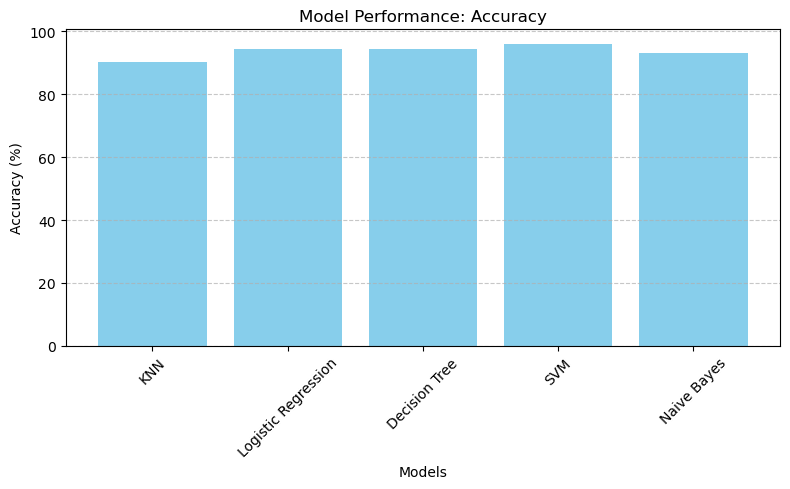

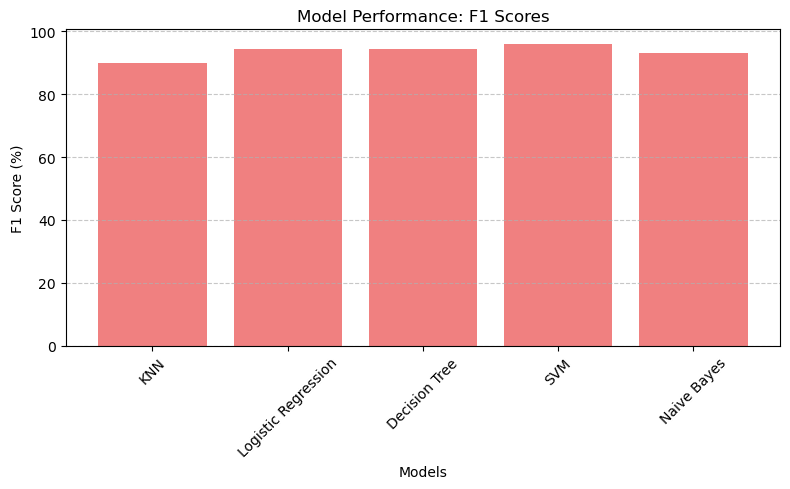

In [58]:
# Dynamically extract models and values
model = list(all_features_model_accuracies.keys())
accuracies = list(all_features_model_accuracies.values())
f1_scores = list(all_features_model_f1_scores.values())

# Validate that the dictionaries have the same keys
if set(all_features_model_accuracies.keys()) != set(all_features_model_f1_scores.keys()):
    raise ValueError("Dictionaries must have the same models as keys")

# --- Plot 1: Bar Chart for Accuracies ---
plt.figure(figsize=(8, 5))
x = np.arange(len(models))
plt.bar(x, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance: Accuracy')
plt.xticks(x, models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Bar Chart for F1 Scores ---
plt.figure(figsize=(8, 5))
x = np.arange(len(models))
plt.bar(x, f1_scores, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.title('Model Performance: F1 Scores')
plt.xticks(x, models, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()